In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
import plotly.express as px
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, StackingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier


In [63]:
df = pd.read_csv('data.xls')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [65]:
gender_counts = df['gender'].value_counts().reset_index()
gender_counts.columns = ['gender', 'count']
fig = px.bar(gender_counts, x='gender', y='count', title='Gender Distribution', labels={'count': 'Count', 'gender': 'Gender'})
fig.show()

In [66]:
multiple_lines_counts = df['MultipleLines'].value_counts().reset_index()
multiple_lines_counts.columns = ['MultipleLines', 'count']

# Create a bar chart using Plotly
fig = px.bar(multiple_lines_counts, x='MultipleLines', y='count', title='Multiple Lines Distribution', labels={'count': 'Count', 'MultipleLines': 'Multiple Lines'})

# Show the plot
fig.show()

In [67]:
InternetService_counts = df['InternetService'].value_counts().reset_index()
InternetService_counts.columns = ['InternetService', 'count']

fig = px.bar(InternetService_counts, x='InternetService', y='count', title='Internet Service Distribution', labels={'count': 'Count', 'InternetService': 'Internet Service'})

fig.show()

In [68]:
contract_counts = df['Contract'].value_counts().reset_index()
contract_counts.columns = ['Contract', 'count']
fig = px.bar(contract_counts, x='Contract', y='count', title='Contract Distribution', labels={'count': 'Count', 'contract': 'contract'})
fig.show()

In [69]:
PaymentMethod_counts = df['PaymentMethod'].value_counts().reset_index()
PaymentMethod_counts.columns = ['PaymentMethod', 'count']

fig = px.bar(PaymentMethod_counts, x='PaymentMethod', y='count', title='Payment Method Distribution', labels={'count': 'Count', 'PaymentMethod': 'Payment Method'})

fig.show()

In [70]:
Churn_counts = df['Churn'].value_counts().reset_index()
Churn_counts.columns = ['Churn', 'count']

fig = px.bar(Churn_counts, x='Churn', y='count', title='Churn Distribution', labels={'count': 'Count', 'Churn': 'Churn'})

fig.show()

# Data Preprocessing

dropping ID column because it's not important

In [71]:
df.drop(['customerID'], axis=1, inplace=True)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


making TotalCharges Column as float instead of object

In [72]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].isnull().sum()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


that caused some values that were filled with whitespace to be nulls

In [73]:
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_16844\2840544469.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


<Axes: xlabel='SeniorCitizen', ylabel='count'>

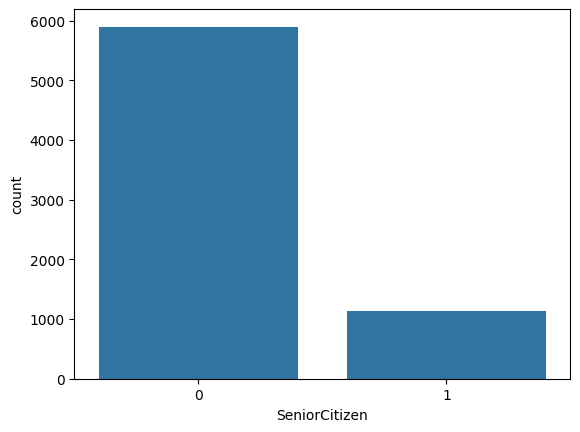

In [75]:
sns.countplot(x='SeniorCitizen', data=df)

column is biased so we'll drop it

In [76]:
df.drop(['SeniorCitizen'], axis=1, inplace=True)

<Axes: xlabel='PhoneService', ylabel='count'>

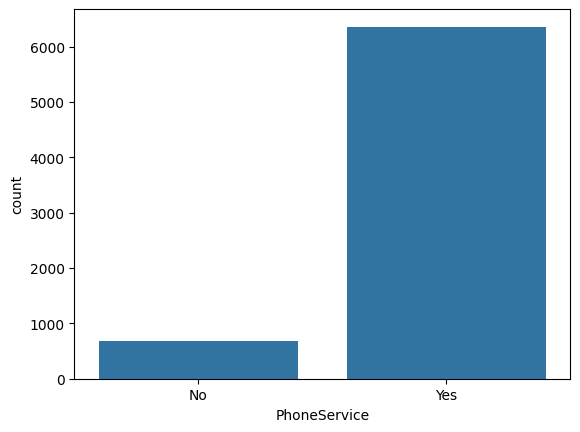

In [77]:
sns.countplot(x='PhoneService', data=df)

same issue biased column so we will drop it as well

In [78]:
df.drop(['PhoneService'], axis=1, inplace=True)
df.head()

,gender,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,Yes,No,1,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,34,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,2,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,45,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,2,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [79]:
df.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2281.916928
std,24.559481,30.090047,2265.270398
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,402.225000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


In [80]:
print(df['tenure'].var())
print(df['MonthlyCharges'].var())
print(df['TotalCharges'].var())

603.1681081237368
905.4109343405098
5131449.978239651


In [81]:
columns_to_normalize = ['tenure', 'MonthlyCharges', 'TotalCharges']
df[columns_to_normalize] = df[columns_to_normalize].apply(lambda x: np.log1p(x))

In [82]:
print(df['tenure'].var())
print(df['MonthlyCharges'].var())
print(df['TotalCharges'].var())

1.3352031177807562
0.33673393400372575
2.3878758766160684


C:\Users\user\AppData\Local\Temp\ipykernel_16844\2175448370.py:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




<Axes: ylabel='tenure'>

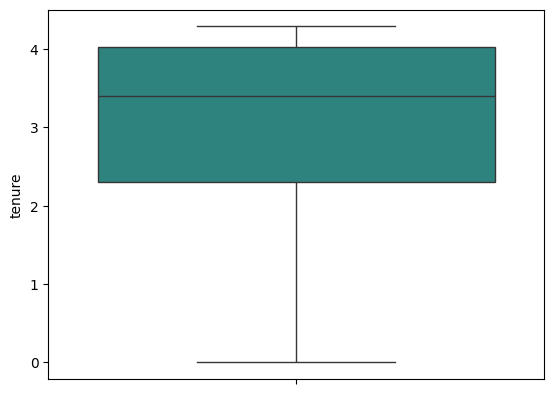

In [83]:
sns.boxplot(data=df, y = 'tenure', palette='viridis')

C:\Users\user\AppData\Local\Temp\ipykernel_16844\1397092401.py:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




<Axes: ylabel='MonthlyCharges'>

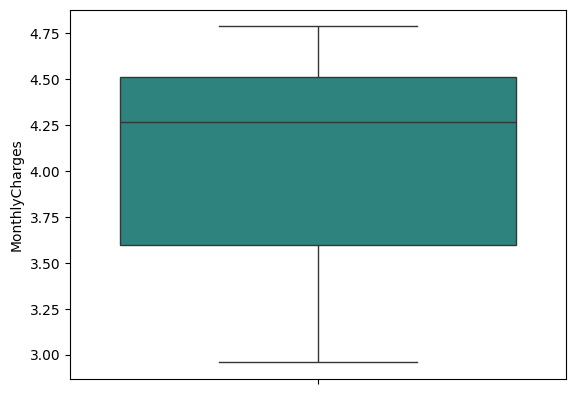

In [84]:
sns.boxplot(data=df, y = 'MonthlyCharges', palette='viridis')

C:\Users\user\AppData\Local\Temp\ipykernel_16844\2592018525.py:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




<Axes: ylabel='TotalCharges'>

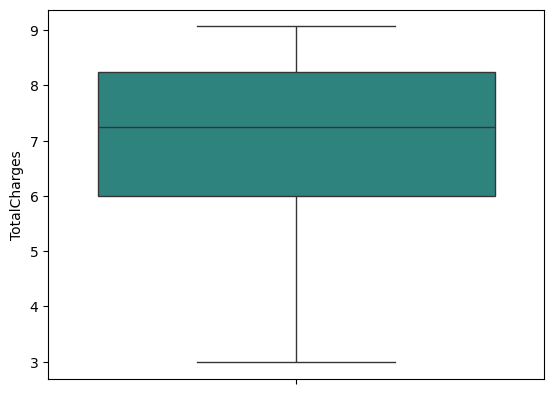

In [85]:
sns.boxplot(data=df, y = 'TotalCharges', palette='viridis')

In [86]:
le = LabelEncoder()
for column in df.select_dtypes(include=['object']).columns:
    df[column] = le.fit_transform(df[column])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int64  
 1   Partner           7043 non-null   int64  
 2   Dependents        7043 non-null   int64  
 3   tenure            7043 non-null   float64
 4   MultipleLines     7043 non-null   int64  
 5   InternetService   7043 non-null   int64  
 6   OnlineSecurity    7043 non-null   int64  
 7   OnlineBackup      7043 non-null   int64  
 8   DeviceProtection  7043 non-null   int64  
 9   TechSupport       7043 non-null   int64  
 10  StreamingTV       7043 non-null   int64  
 11  StreamingMovies   7043 non-null   int64  
 12  Contract          7043 non-null   int64  
 13  PaperlessBilling  7043 non-null   int64  
 14  PaymentMethod     7043 non-null   int64  
 15  MonthlyCharges    7043 non-null   float64
 16  TotalCharges      7043 non-null   float64


In [87]:
X = df.drop(['Churn'], axis=1)
y = df['Churn']


In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5634, 17)
(1409, 17)
(5634,)
(1409,)


# XGBoost

In [89]:
xg_model = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42,
    use_label_encoder=False,
    eval_metric='mlogloss',
    colsample_bytree=0.8,
    subsample=0.8
)

xg_model.fit(X_train, y_train)
y_pred_xg = xg_model.predict(X_test)

c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning:

[12:29:56] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.




In [90]:
print(xg_model.score(X_train, y_train))
print(confusion_matrix(y_test, y_pred_xg))
print(accuracy_score(y_test, y_pred_xg))
print(classification_report(y_test, y_pred_xg))


0.820376286829961
[[939  97]
 [167 206]]
0.8126330731014905
              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1036
           1       0.68      0.55      0.61       373

    accuracy                           0.81      1409
   macro avg       0.76      0.73      0.74      1409
weighted avg       0.80      0.81      0.81      1409



<Axes: >

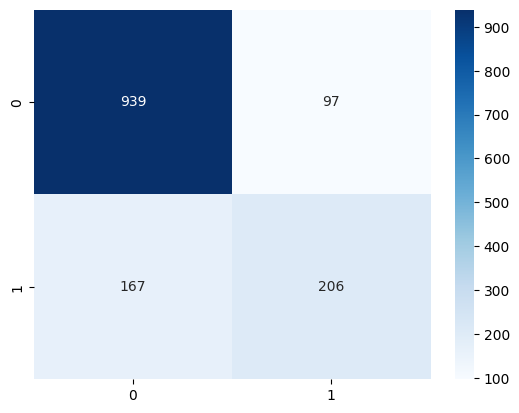

In [91]:
sns.heatmap(confusion_matrix(y_test, y_pred_xg), annot=True, fmt='d', cmap='Blues')

# AdaBoost

In [92]:
ada_boost = AdaBoostClassifier(estimator=DecisionTreeClassifier()) 


In [93]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.1, 1.0, 2.0],
    'estimator__max_depth': [1, 2, 3]
}

In [94]:
grid_search = GridSearchCV(ada_boost, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.

c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.

c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.

c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the S

GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(estimator=DecisionTreeClassifier()),
             param_grid={'estimator__max_depth': [1, 2, 3],
                         'learning_rate': [0.1, 1.0, 2.0],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [95]:
print("Best hyperparameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Best hyperparameters: {'estimator__max_depth': 2, 'learning_rate': 0.1, 'n_estimators': 100}
Best score: 0.8020929833049909


In [96]:
best_params = {'estimator__max_depth': 2, 'learning_rate': 0.1, 'n_estimators': 100} 

In [97]:
best_ada_boost = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=best_params['estimator__max_depth']),
                                    learning_rate=best_params['learning_rate'],
                                    n_estimators=best_params['n_estimators'])

In [98]:
best_ada_boost.fit(X_train, y_train)

y_pred_ada = best_ada_boost.predict(X_test)

c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



In [99]:
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred_ada)
precision = precision_score(y_test, y_pred_ada, average='weighted') 
recall = recall_score(y_test, y_pred_ada, average='weighted') 
f1 = f1_score(y_test, y_pred_ada, average='weighted') 

In [100]:
print("Training Score:", best_ada_boost.score(X_train, y_train))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_ada))
print("\nAccuracy:")
print(accuracy_score(y_test, y_pred_ada))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_ada))

Training Score: 0.8122115725949591

Confusion Matrix:
[[947  89]
 [178 195]]

Accuracy:
0.8105039034776437

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.91      0.88      1036
           1       0.69      0.52      0.59       373

    accuracy                           0.81      1409
   macro avg       0.76      0.72      0.74      1409
weighted avg       0.80      0.81      0.80      1409



# Random Forest

In [101]:
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=20,
    max_samples=0.8,
    bootstrap=True,
    random_state=42
    )

In [102]:
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

In [103]:
print(rf_model.score(X_train, y_train))
print(confusion_matrix(y_test, rf_pred))
print(accuracy_score(y_test, rf_pred))
print(classification_report(y_test, rf_pred))

0.9968051118210862
[[946  90]
 [198 175]]
0.7955997161107168
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.66      0.47      0.55       373

    accuracy                           0.80      1409
   macro avg       0.74      0.69      0.71      1409
weighted avg       0.78      0.80      0.78      1409



<Axes: >

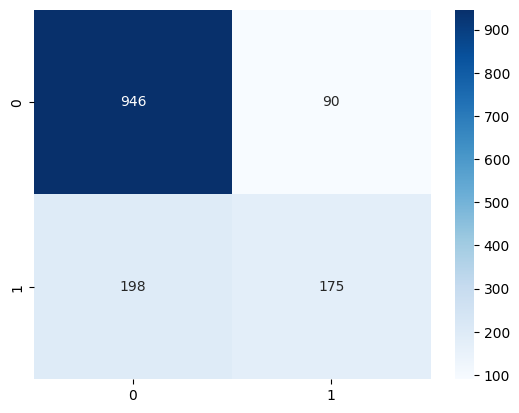

In [104]:
sns.heatmap(confusion_matrix(y_test, rf_pred), annot=True, fmt='d', cmap='Blues')

# Bagging Different Method

In [105]:
models={
    "bagg+logistic":BaggingClassifier(
        estimator=LogisticRegression(max_iter=1000),
        n_estimators=10,
        random_state=42
    ),
    "bagg+svc":BaggingClassifier(
        estimator=SVC(probability=True),
        n_estimators=10,
        random_state=42
    ),
    "bagg+knn":BaggingClassifier(
    estimator=KNeighborsClassifier(n_neighbors=5),
    n_estimators=10,
    random_state=42
)
    
    
}

In [106]:
bag_accuracies = {}
for name, model in models.items():
    print(f"\n Training: {name}")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{name} training accuracy: {model.score(X_train, y_train)}")
    acc = accuracy_score(y_test, y_pred)
    bag_accuracies[name] = acc
    print(f"Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))



 Training: bagg+logistic
bagg+logistic training accuracy: 0.8022719204827831
Accuracy: 0.8119
              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1036
           1       0.68      0.54      0.61       373

    accuracy                           0.81      1409
   macro avg       0.76      0.73      0.74      1409
weighted avg       0.80      0.81      0.80      1409


 Training: bagg+svc
bagg+svc training accuracy: 0.7992545260915868
Accuracy: 0.7984
              precision    recall  f1-score   support

           0       0.82      0.92      0.87      1036
           1       0.68      0.45      0.54       373

    accuracy                           0.80      1409
   macro avg       0.75      0.69      0.71      1409
weighted avg       0.79      0.80      0.78      1409


 Training: bagg+knn
bagg+knn training accuracy: 0.8404330848420305
Accuracy: 0.7750
              precision    recall  f1-score   support

           0       0.83   

# Stacking

In [107]:
base_models = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)), # Decision Tree-Based Models
    ('svc', SVC(probability=True, random_state=42)), # Kernel-Based Models
    ('knn', KNeighborsClassifier()), # Instance-Based Models
]

In [108]:
# Define meta-model
meta_model = XGBClassifier()

In [109]:
# Create stacking classifier
stacking_classifier = StackingClassifier(estimators=base_models, final_estimator=meta_model)

# Train model
stacking_classifier.fit(X_train, y_train)

StackingClassifier(estimators=[('rf', RandomForestClassifier(random_state=42)),
                               ('svc', SVC(probability=True, random_state=42)),
                               ('knn', KNeighborsClassifier())],
                   final_estimator=XGBClassifier(base_score=None, booster=None,
                                                 callbacks=None,
                                                 colsample_bylevel=None,
                                                 colsample_bynode=None,
                                                 colsample_bytree=None,
                                                 device=None,
                                                 early_stopping_rounds=None,
                                                 enable_categor...
                                                 feature_weights=None,
                                                 gamma=None, grow_policy=None,
                                                 importance_type=None,
                                                 interaction_constraints=None,
                                                 learning_rate=None,
                                                 max_bin=None,
                                                 max_cat_threshold=None,
                                                 max_cat_to_onehot=None,
                                                 max_delta_step=None,
                                                 max_depth=None,
                                                 max_leaves=None,
                                                 min_child_weight=None,
                                                 missing=nan,
                                                 monotone_constraints=None,
                                                 multi_strategy=None,
                                                 n_estimators=None, n_jobs=None,
                                                 num_parallel_tree=None, ...))

In [110]:
# Make predictions
stacking_pred = stacking_classifier.predict(X_test)


In [111]:
# Evaluate training accuracy
print(f"Training Accuracy: {stacking_classifier.score(X_train, y_train):.4f}")

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, stacking_pred))

print(f"Stacking Model Accuracy: {accuracy:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, stacking_pred))


Training Accuracy: 0.8371

Confusion Matrix:
[[929 107]
 [176 197]]
Stacking Model Accuracy: 0.8105

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1036
           1       0.65      0.53      0.58       373

    accuracy                           0.80      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409



<Axes: >

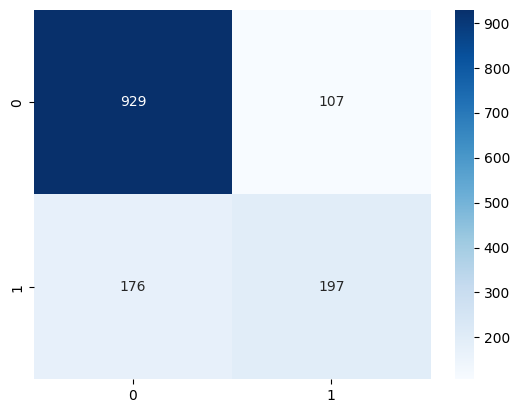

In [112]:
sns.heatmap(confusion_matrix(y_test, stacking_pred), annot=True, fmt="d", cmap="Blues")

# Comparison

                           Model  Accuracy
0                        XGBoost  0.812633
3  Bagging + Logistic Regression  0.811923
2                       AdaBoost  0.810504
6            Stacking Classifier  0.799148
4                  Bagging + SVC  0.798439
1                  Random Forest  0.795600
5                  Bagging + KNN  0.775018


C:\Users\user\AppData\Local\Temp\ipykernel_16844\2776073918.py:16: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




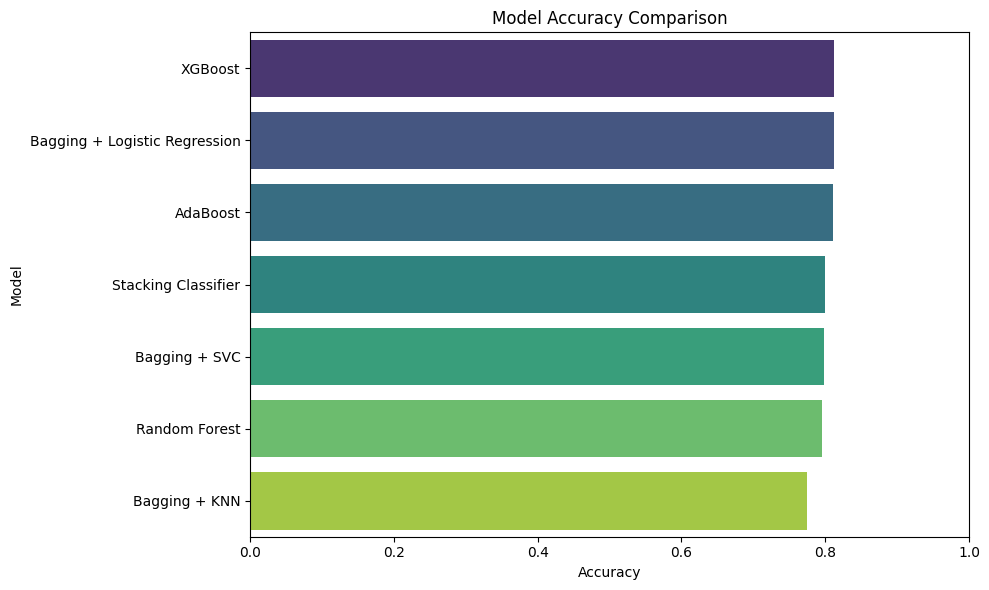

In [123]:
accuracies = {
    "XGBoost": accuracy_score(y_test, y_pred_xg),
    "Random Forest": accuracy_score(y_test, rf_pred),
    "AdaBoost": accuracy,
    "Bagging + Logistic Regression": bag_accuracies["bagg+logistic"],
    "Bagging + SVC": bag_accuracies["bagg+svc"],
    "Bagging + KNN": bag_accuracies["bagg+knn"],
    "Stacking Classifier": accuracy_score(y_test, stacking_pred)
}

accuracies_df = pd.DataFrame(list(accuracies.items()), columns=["Model", "Accuracy"])
accuracies_df = accuracies_df.sort_values(by="Accuracy", ascending=False)
print(accuracies_df)

plt.figure(figsize=(10, 6))
sns.barplot(data=accuracies_df, x='Accuracy', y='Model', palette='viridis')
plt.title('Model Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Model')
plt.xlim(0, 1)  # Assuming accuracy scores between 0 and 1
plt.tight_layout()
plt.show()